In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
# Paths
train_dir = "dataset/train"
test_dir = "dataset/test"
img_size = (48, 48)
batch_size = 64

In [4]:
# Image loading
train_gen = ImageDataGenerator(rescale=1./255)
test_gen = ImageDataGenerator(rescale=1./255)

train_data = train_gen.flow_from_directory(
    train_dir, target_size=img_size, color_mode='grayscale',
    batch_size=batch_size, class_mode='categorical', shuffle=True
)

test_data = test_gen.flow_from_directory(
    test_dir, target_size=img_size, color_mode='grayscale',
    batch_size=batch_size, class_mode='categorical', shuffle=False
)

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [5]:
# CNN Model
model = Sequential([
    Conv2D(64, (3,3), activation='relu', input_shape=(48, 48, 1)),
    MaxPooling2D(2,2), Dropout(0.25),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2), Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'), Dropout(0.5),
    Dense(train_data.num_classes, activation='softmax')
])

C:\Users\sk521\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Compile & Train
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_data, epochs=30, validation_data=test_data)

C:\Users\sk521\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 421s 933ms/step - accuracy: 0.2650 - loss: 1.7944 - val_accuracy: 0.4090 - val_loss: 1.5526
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 75s 167ms/step - accuracy: 0.3997 - loss: 1.5527 - val_accuracy: 0.4611 - val_loss: 1.4160
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 64s 143ms/step - accuracy: 0.4514 - loss: 1.4334 - val_accuracy: 0.4847 - val_loss: 1.3422
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 144ms/step - accuracy: 0.4801 - loss: 1.3635 - val_accuracy: 0.5060 - val_loss: 1.2964
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 64s 143ms/step - accuracy: 0.5014 - loss: 1.3058 - val_accuracy: 0.5093 - val_loss: 1.2695
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 144ms/step - accuracy: 0.5192 - loss: 1.2742 - val_accuracy: 0.5191 - val_loss: 1.2479
Epoch 7/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 65s 144ms/step - accuracy: 0.5339 - loss: 1.2350 - val_accuracy: 0.5258 - val_loss: 1.2288
Epoch 8/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 66s 146ms/step - accuracy: 0.5541 - loss: 

In [7]:
# Save model
model.save("cnn_emotion_model.h5")

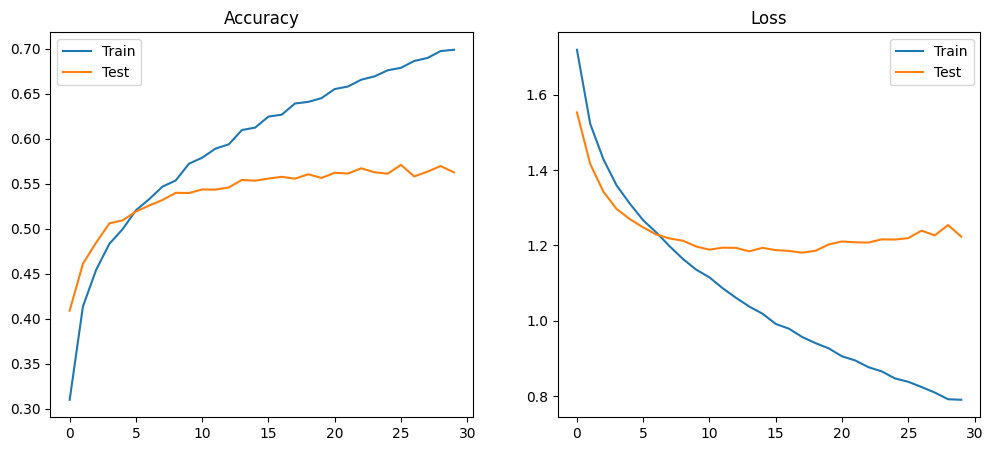

In [8]:
# Plot
plt.figure(figsize=(12, 5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train')
plt.plot(history.history['val_accuracy'], label='Test')
plt.title("Accuracy"); plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train')
plt.plot(history.history['val_loss'], label='Test')
plt.title("Loss"); plt.legend()
plt.show()
